In [1]:
import pandas as pd  # Importing pandas library for data manipulation
import numpy as np   # Importing numpy library for numerical operations
import seaborn as sns  # Importing seaborn library for data visualization
import os   # Importing os library to handle files using system commands
import matplotlib.pyplot as plt  # Importing matplotlib library for plotting
from IPython.display import Audio  # Importing Audio class from IPython.display module for playing audio
import librosa   # Importing librosa library for audio processing
import librosa.display  # Importing display module from librosa library for displaying audio data
import warnings  # Importing warnings module to handle warnings
warnings.filterwarnings('ignore')  # Ignore all warnings during runtime

In [2]:
# Loading the Data

In [3]:
# Initialize empty lists to store file paths and labels
paths = []
labels = []

# Walk through the directory and its subdirectories
# os.walk() generates the file names in a directory tree
# r before the path string ensures it's treated as a raw string, so backslashes are treated literally
for dirname, _, filenames in os.walk(r"C:\Users\naimu\Music\Speech Recognition ML DL AI\Dataset\voice recordings dateset"):
    # Iterate through each file in the current directory
    for filename in filenames:
        # Concatenate the directory path and the file name to get the full file path
        paths.append(os.path.join(dirname, filename))
        # Extract the label from the file name by splitting on underscores and removing the file extension
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        # Convert the label to lowercase and append it to the labels list
        labels.append(label.lower())
    # Check if the number of paths is equal to 2800 to limit the number of files loaded
    if len(paths) == 2800:
        break

# Print a message indicating that the dataset is loaded
print('Dataset is loaded')


Dataset is loaded


In [4]:
print(paths[:5])

['C:\\Users\\naimu\\Music\\Speech Recognition ML DL AI\\Dataset\\voice recordings dateset\\afrikaans1.mp3', 'C:\\Users\\naimu\\Music\\Speech Recognition ML DL AI\\Dataset\\voice recordings dateset\\afrikaans2.mp3', 'C:\\Users\\naimu\\Music\\Speech Recognition ML DL AI\\Dataset\\voice recordings dateset\\afrikaans3.mp3', 'C:\\Users\\naimu\\Music\\Speech Recognition ML DL AI\\Dataset\\voice recordings dateset\\afrikaans4.mp3', 'C:\\Users\\naimu\\Music\\Speech Recognition ML DL AI\\Dataset\\voice recordings dateset\\afrikaans5.mp3']


In [5]:
print(labels[:5])

['afrikaans1', 'afrikaans2', 'afrikaans3', 'afrikaans4', 'afrikaans5']


In [6]:
# Dataframe

In [7]:
# Create an empty DataFrame to store speech file paths and their corresponding labels
df = pd.DataFrame()

# Assign paths to the 'speech' column and labels to the 'label' column
df['speech'] = paths
df['label'] = labels

# Display the first few rows of the DataFrame to inspect the data
df.head()

speech       label
0  C:\Users\naimu\Music\Speech Recognition ML DL ...  afrikaans1
1  C:\Users\naimu\Music\Speech Recognition ML DL ...  afrikaans2
2  C:\Users\naimu\Music\Speech Recognition ML DL ...  afrikaans3
3  C:\Users\naimu\Music\Speech Recognition ML DL ...  afrikaans4
4  C:\Users\naimu\Music\Speech Recognition ML DL ...  afrikaans5

In [8]:
df['label'].value_counts()

afrikaans1    1
mandarin34    1
mandarin47    1
mandarin46    1
mandarin45    1
             ..
english438    1
english437    1
english436    1
english435    1
zulu1         1
Name: label, Length: 2138, dtype: int64

In [9]:
# Exploratory Data Analysis

<Axes: xlabel='label', ylabel='count'>

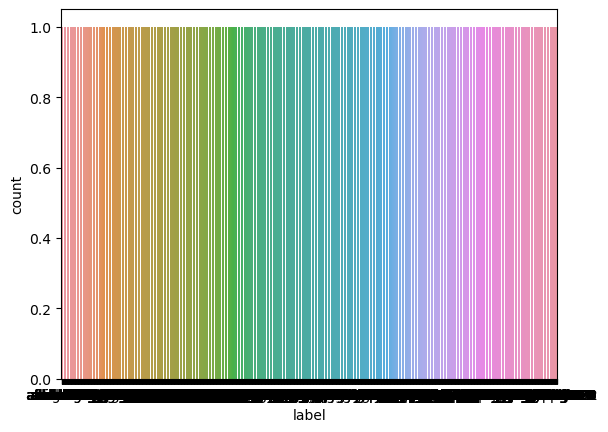

In [10]:
sns.countplot(data=df,x='label') #To check if all the data is uniformly distributed

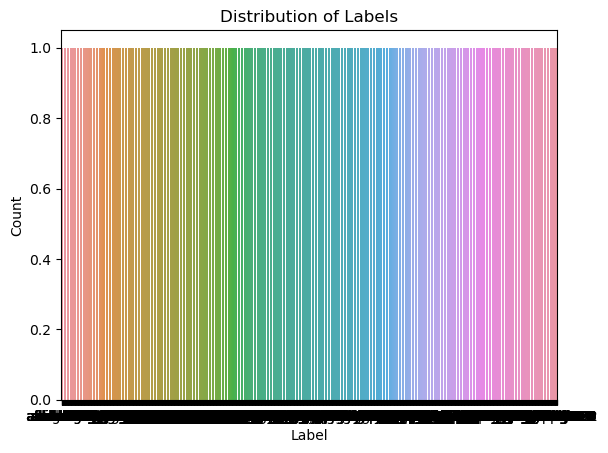

In [11]:
# Visualize the distribution of labels using a countplot
sns.countplot(data=df, x='label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.show()

In [12]:
def waveform(data, sr, emotion):
    """
    Plot the waveform of audio data.

    Parameters:
        data (np.ndarray): Audio data.
        sr (int): Sampling rate of the audio data.
        emotion (str): Emotion label.

    Returns:
        None
    """
    plt.figure(figsize=(10, 4))  # Set the figure size
    plt.title(emotion, size=20)  # Set the title with emotion label
    librosa.display.waveshow(data, sr=sr)  # Display the waveform
    plt.show()  # Show the plot


def spectrogram(data, sr, emotion):
    """
    Plot the spectrogram of audio data.

    Parameters:
        data (np.ndarray): Audio data.
        sr (int): Sampling rate of the audio data.
        emotion (str): Emotion label.

    Returns:
        None
    """
    # Compute the short-time Fourier transform
    x = librosa.stft(data)
    # Convert amplitude to decibels
    xdb = librosa.amplitude_to_db(abs(x))
    
    plt.figure(figsize=(10, 4))  # Set the figure size
    plt.title(emotion, size=20)  # Set the title with emotion label
    # Display the spectrogram
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()  # Add colorbar for amplitude scale

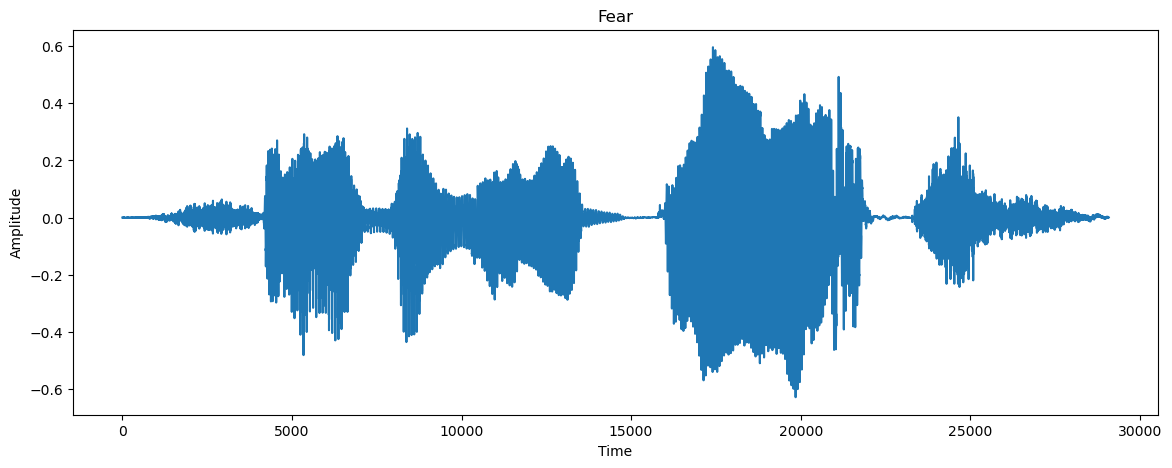

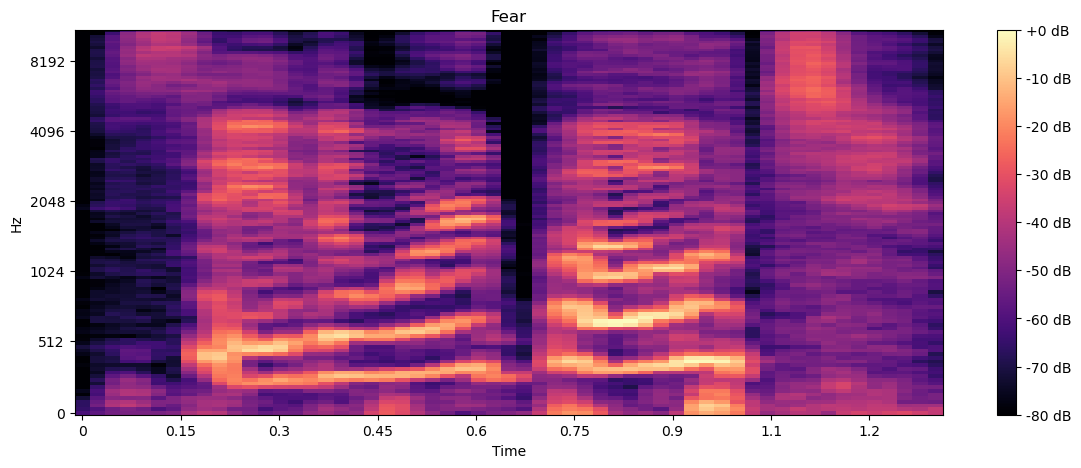

In [17]:
emotion_path = r"C:\Users\naimu\Music\Speech Recognition ML DL AI\Dataset\emotional speech dataset\YAF_fear\YAF_boat_fear.wav"
data, sampling_rate = librosa.load(emotion_path)

# Define waveform and spectrogram plotting functions
def plot_waveform(data, sampling_rate, title):
    plt.figure(figsize=(14, 5))
    plt.plot(data)
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.show()

def plot_spectrogram(data, sampling_rate, title):
    plt.figure(figsize=(14, 5))
    S = librosa.feature.melspectrogram(y=data, sr=sampling_rate)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), sr=sampling_rate, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show()

# Plot the waveform
plot_waveform(data, sampling_rate, "Fear")

# Plot the spectrogram
plot_spectrogram(data, sampling_rate, "Fear")

# Play the audio
Audio(data, rate=sampling_rate)

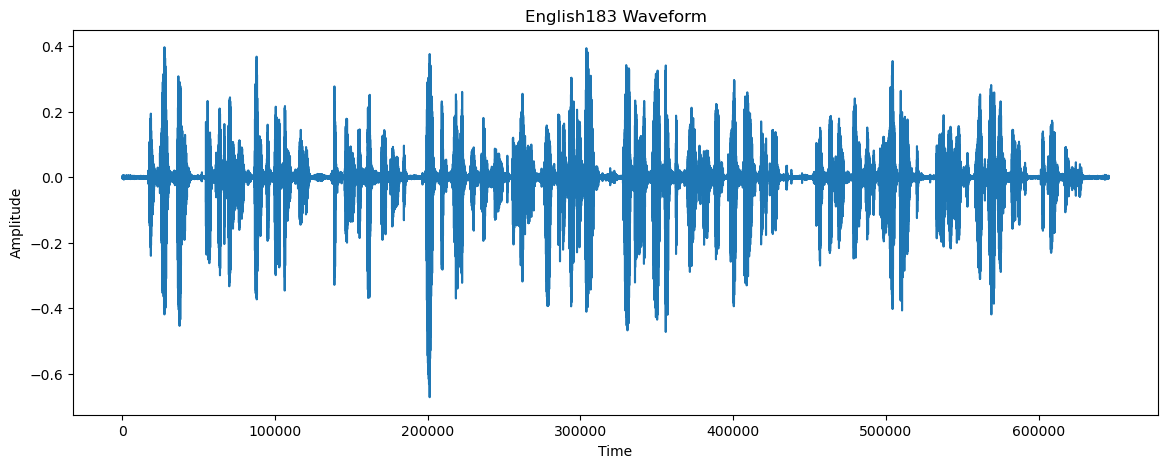

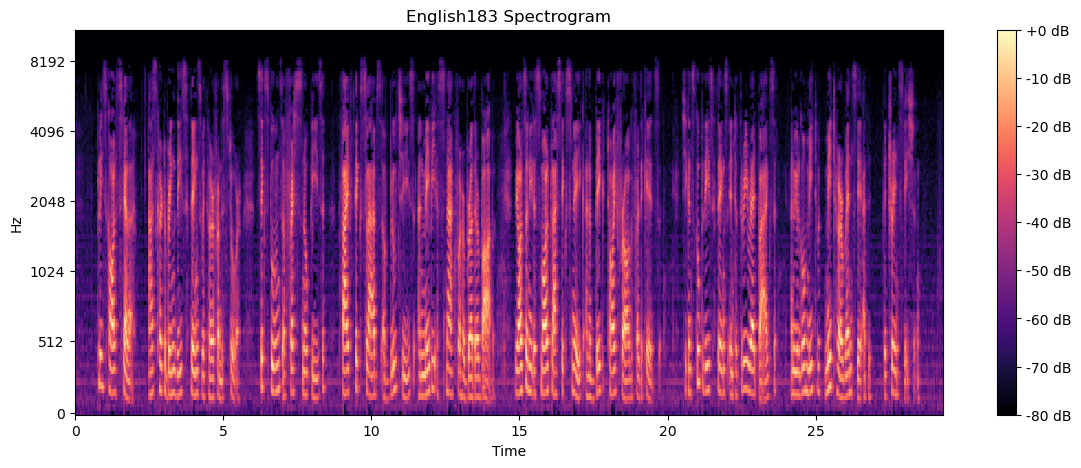

In [22]:
emotion_path = r"C:\Users\naimu\Music\Speech Recognition ML DL AI\Dataset\voice recordings dateset\english183.mp3"
data, sampling_rate = librosa.load(emotion_path)

# Define waveform and spectrogram plotting functions
def plot_waveform(data, sampling_rate, title):
    plt.figure(figsize=(14, 5))
    plt.plot(data)
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.show()

def plot_spectrogram(data, sampling_rate, title):
    plt.figure(figsize=(14, 5))
    S = librosa.feature.melspectrogram(y=data, sr=sampling_rate)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), sr=sampling_rate, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show()

# Plot the waveform
plot_waveform(data, sampling_rate, "English183 Waveform")

# Plot the spectrogram
plot_spectrogram(data, sampling_rate, "English183 Spectrogram")

# Play the audio
Audio(data, rate=sampling_rate)

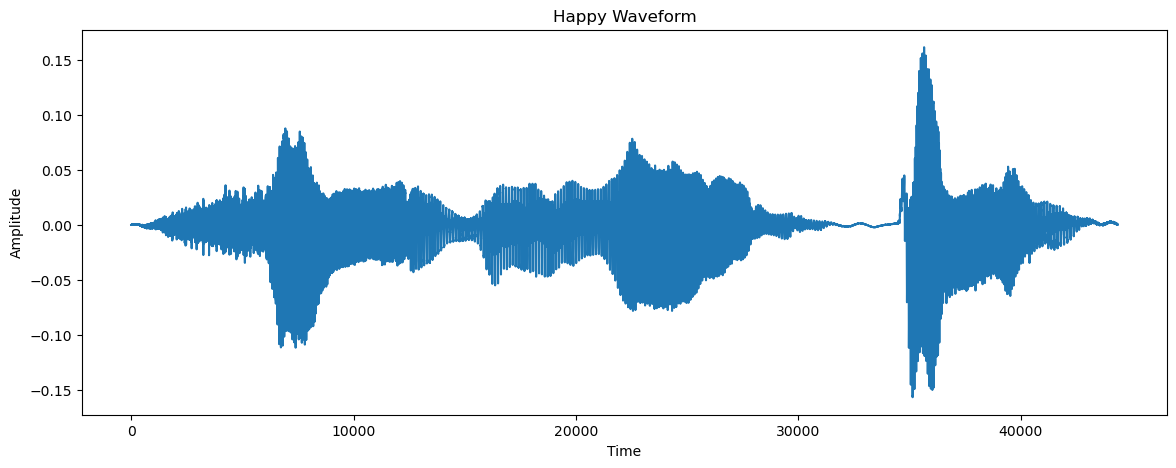

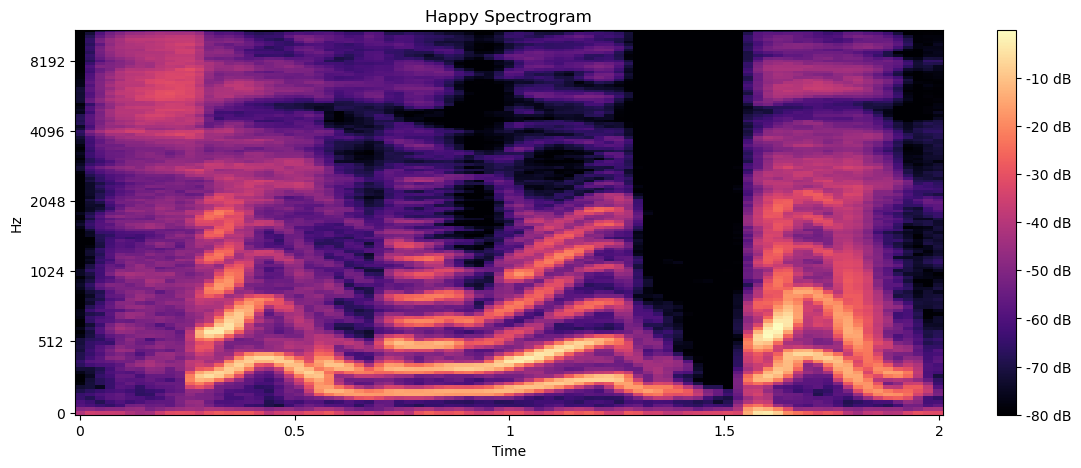

In [20]:
emotion_path = r"C:\Users\naimu\Music\Speech Recognition ML DL AI\Dataset\emotional speech dataset\OAF_happy\OAF_beg_happy.wav"
data, sampling_rate = librosa.load(emotion_path)

# Define waveform and spectrogram plotting functions
def plot_waveform(data, sampling_rate, title):
    plt.figure(figsize=(14, 5))
    plt.plot(data)
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.show()

def plot_spectrogram(data, sampling_rate, title):
    plt.figure(figsize=(14, 5))
    S = librosa.feature.melspectrogram(y=data, sr=sampling_rate)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), sr=sampling_rate, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show()

# Plot the waveform
plot_waveform(data, sampling_rate, "Happy Waveform")

# Plot the spectrogram
plot_spectrogram(data, sampling_rate, "Happy Spectrogram")

# Play the audio
Audio(data, rate=sampling_rate)

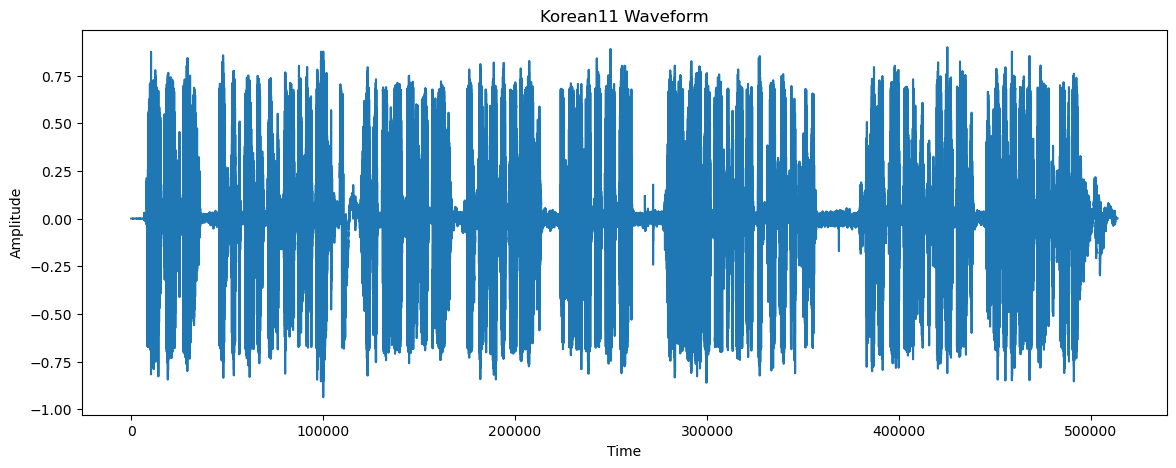

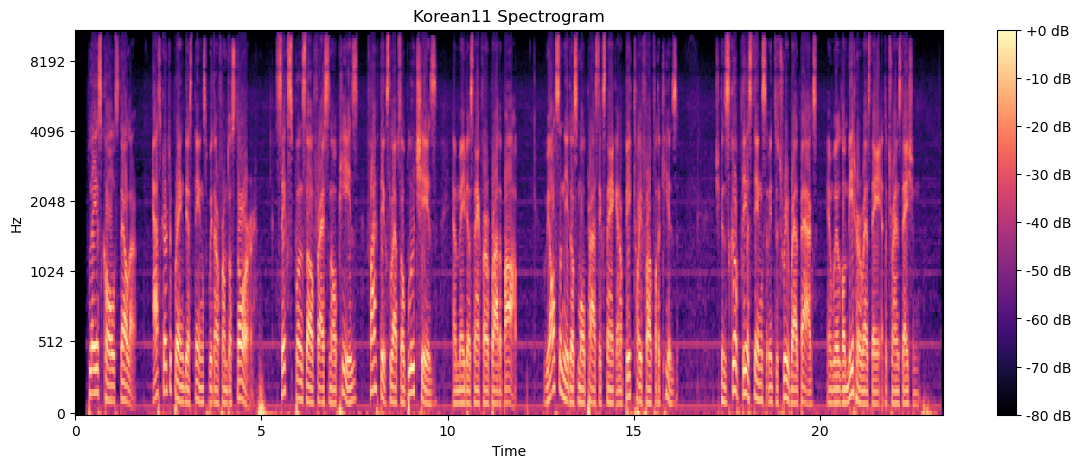

In [21]:
emotion_path = r"C:\Users\naimu\Music\Speech Recognition ML DL AI\Dataset\voice recordings dateset\korean11.mp3"
data, sampling_rate = librosa.load(emotion_path)

# Define waveform and spectrogram plotting functions
def plot_waveform(data, sampling_rate, title):
    plt.figure(figsize=(14, 5))
    plt.plot(data)
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.show()

def plot_spectrogram(data, sampling_rate, title):
    plt.figure(figsize=(14, 5))
    S = librosa.feature.melspectrogram(y=data, sr=sampling_rate)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), sr=sampling_rate, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show()

# Plot the waveform
plot_waveform(data, sampling_rate, "Korean11 Waveform")

# Plot the spectrogram
plot_spectrogram(data, sampling_rate, "Korean11 Spectrogram")

# Play the audio
Audio(data, rate=sampling_rate)

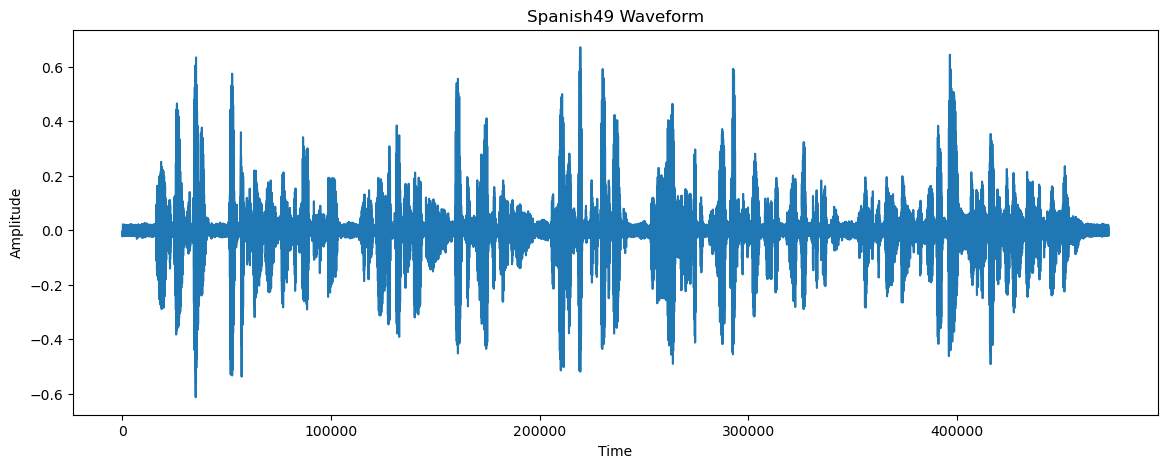

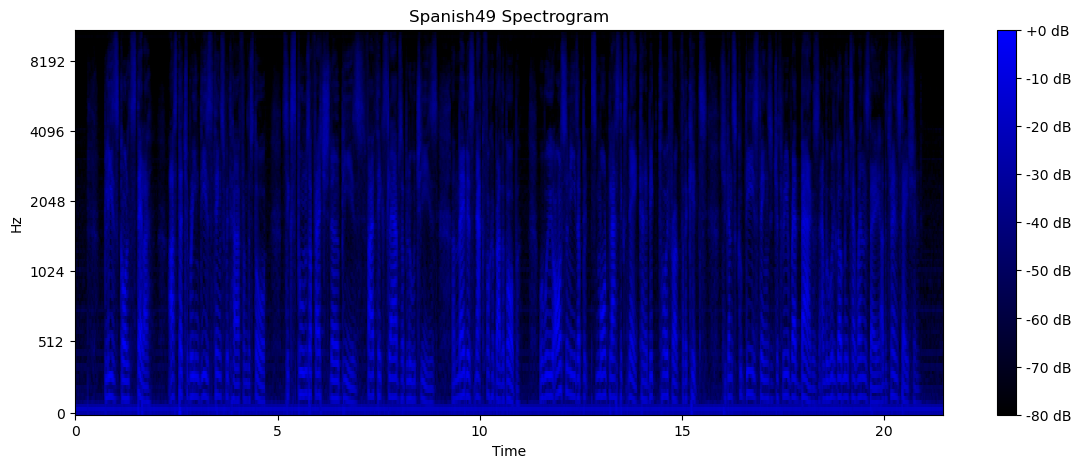

In [25]:
import librosa
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import Audio

emotion_path = r"C:\Users\naimu\Music\Speech Recognition ML DL AI\Dataset\voice recordings dateset\spanish49.mp3"
data, sampling_rate = librosa.load(emotion_path)

# Define waveform and spectrogram plotting functions
def plot_waveform(data, sampling_rate, title):
    plt.figure(figsize=(14, 5))
    plt.plot(data)
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.show()

def plot_spectrogram(data, sampling_rate, title):
    plt.figure(figsize=(14, 5))
    S = librosa.feature.melspectrogram(y=data, sr=sampling_rate)
    
    # Define blue colormap
    cmap = LinearSegmentedColormap.from_list("blue", [(0, "black"), (1, "blue")])
    
    # Plot spectrogram with blue colormap
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), sr=sampling_rate, cmap=cmap, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show()

# Plot the waveform
plot_waveform(data, sampling_rate, "Spanish49 Waveform")

# Plot the spectrogram
plot_spectrogram(data, sampling_rate, "Spanish49 Spectrogram")

# Play the audio
Audio(data, rate=sampling_rate)

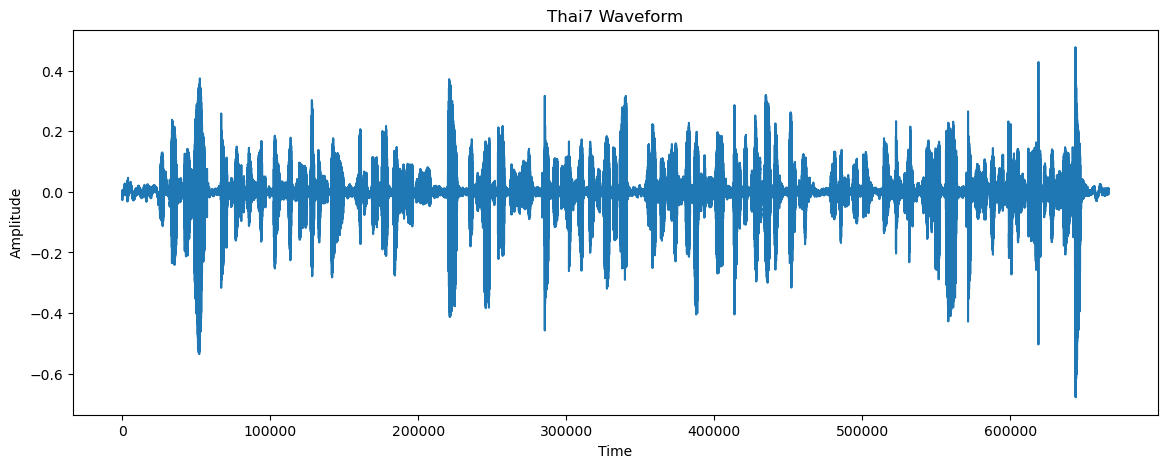

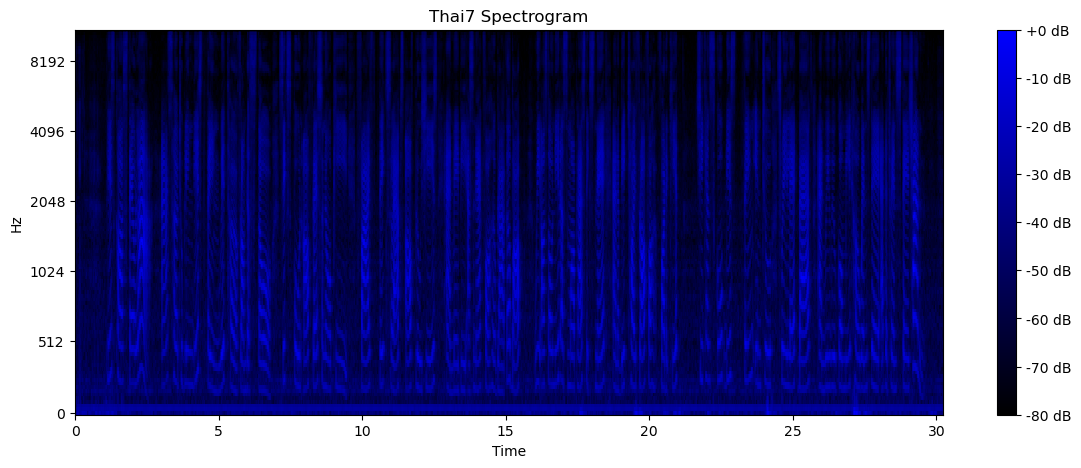

In [26]:
import librosa
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import Audio

# Define the path to the audio file
emotion_path = r"C:\Users\naimu\Music\Speech Recognition ML DL AI\Dataset\voice recordings dateset\thai7.mp3"

# Load the audio file
data, sampling_rate = librosa.load(emotion_path)

# Define waveform and spectrogram plotting functions
def plot_waveform(data, sampling_rate, title):
    plt.figure(figsize=(14, 5))
    plt.plot(data)
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.show()

def plot_spectrogram(data, sampling_rate, title):
    plt.figure(figsize=(14, 5))
    
    # Compute the spectrogram
    S = librosa.feature.melspectrogram(y=data, sr=sampling_rate)
    
    # Define a blue colormap
    cmap = LinearSegmentedColormap.from_list("blue", [(0, "black"), (1, "blue")])
    
    # Plot the spectrogram with the blue colormap
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), sr=sampling_rate, cmap=cmap, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show()

# Plot the waveform
plot_waveform(data, sampling_rate, "Thai7 Waveform")

# Plot the spectrogram
plot_spectrogram(data, sampling_rate, "Thai7 Spectrogram")

# Play the audio
Audio(data, rate=sampling_rate)

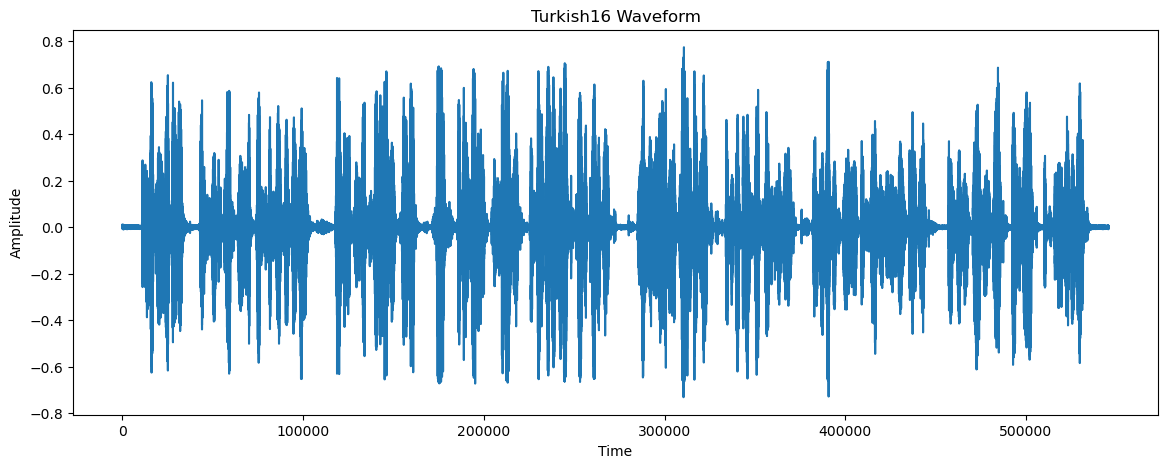

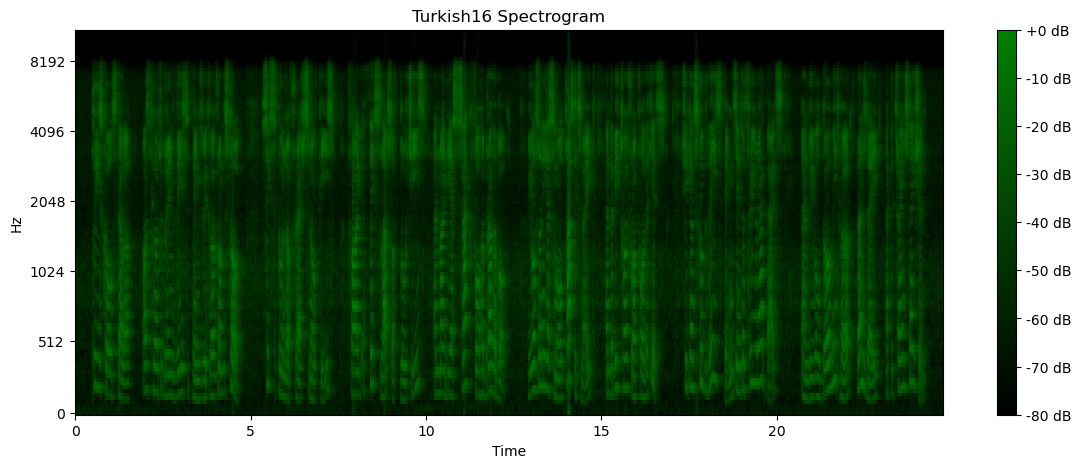

In [27]:
import librosa
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import Audio

# Define the path to the audio file
emotion_path = r"C:\Users\naimu\Music\Speech Recognition ML DL AI\Dataset\voice recordings dateset\turkish16.mp3"

# Load the audio file
data, sampling_rate = librosa.load(emotion_path)

# Define waveform and spectrogram plotting functions
def plot_waveform(data, sampling_rate, title):
    plt.figure(figsize=(14, 5))
    plt.plot(data)
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.show()

def plot_spectrogram(data, sampling_rate, title):
    plt.figure(figsize=(14, 5))
    
    # Compute the spectrogram
    S = librosa.feature.melspectrogram(y=data, sr=sampling_rate)
    
    # Define a green colormap
    cmap = LinearSegmentedColormap.from_list("green", [(0, "black"), (1, "green")])
    
    # Plot the spectrogram with the green colormap
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), sr=sampling_rate, cmap=cmap, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show()

# Plot the waveform
plot_waveform(data, sampling_rate, "Turkish16 Waveform")

# Plot the spectrogram
plot_spectrogram(data, sampling_rate, "Turkish16 Spectrogram")

# Play the audio
Audio(data, rate=sampling_rate)

In [29]:
#Extracting Features

In [30]:
def extract_mfcc(filename):
    # Load audio file
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    
    # Compute MFCCs
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    
    return mfcc

In [34]:
mfcc_features = extract_mfcc(df['speech'][0])

In [35]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [36]:
X_mfcc

0       [-234.91673, 102.58702, 6.189777, 34.76754, 5....
1       [-202.23898, 93.55253, 9.57225, 37.31385, 16.6...
2       [-289.06772, 111.877686, 7.385405, 36.04357, 3...
3       [-211.01845, 110.23823, 10.569832, 44.48432, 4...
4       [-290.98648, 105.7842, 21.035458, 9.536024, -0...
                              ...                        
2133    [-299.22855, 115.866196, -31.73065, 35.766224,...
2134    [-297.26923, 134.0446, -3.509966, 43.912613, -...
2135    [-385.01947, 129.72339, 8.923049, 18.84001, -1...
2136    [-315.04608, 140.01138, -31.819925, 32.532696,...
2137    [-231.13696, 91.88215, -12.726457, 8.432244, -...
Name: speech, Length: 2138, dtype: object

In [37]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2138, 40)

In [38]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2138, 40, 1)

In [39]:
from sklearn.preprocessing import OneHotEncoder

enc=OneHotEncoder()
y=enc.fit_transform(df[['label']])

In [40]:
y=y.toarray()

In [41]:
y.shape

(2138, 2138)

In [59]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

model=Sequential([
   LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 256)            │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.utils import to_categorical

# Assuming df contains your DataFrame with speech paths and labels
# Extracting features
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))
X = np.array([x for x in X_mfcc])
X = np.expand_dims(X, -1)

# One-hot encode target labels
enc = OneHotEncoder()
y_encoded = enc.fit_transform(df[['label']]).toarray()

# Split data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define the number of classes
num_classes = y_encoded.shape[1]

# Build the model
model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40, 1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=64)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 256)            │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 2138)           │       138,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 444,314 (1.69 MB)

 Trainable params: 444,314 (1.69 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.0000e+00 - loss: 7.6721 - val_accuracy: 0.0000e+00 - val_loss: 7.6845
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.0000e+00 - loss: 7.6543 - val_accuracy: 0.0000e+00 - val_loss: 7.9476
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.0012 - loss: 7.4039 - val_accuracy: 0.0000e+00 - val_loss: 8.4412
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.0040 - loss: 7.1000 - val_accuracy: 0.0000e+00 - val_loss: 9.5800
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.0027 - loss: 6.7629 - val_accuracy: 0.0000e+00 - val_loss: 10.6567
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.0038 - loss: 6.4812 - val_accuracy: 0.0000e+00 - val_loss: 11.6555
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.0047 - loss: 6.2236 - val_accuracy: 0.0000e+00 - val_loss: 13.1030
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.0072 -

27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.3272 - loss: 2.2678 - val_accuracy: 0.0000e+00 - val_loss: 24.1319


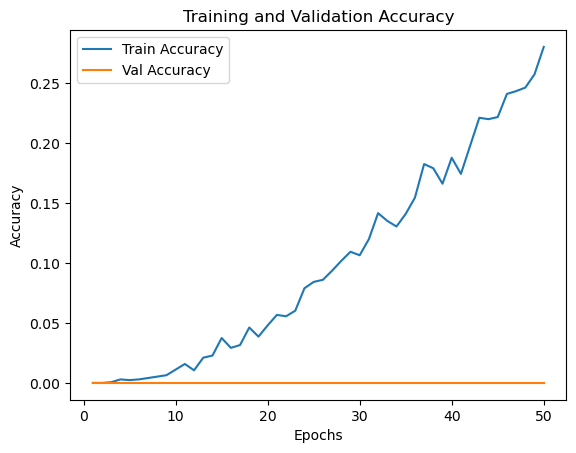

In [70]:
import os

# Plotting the training and validation accuracy
plt.plot(epochs, acc, label='Train Accuracy')
plt.plot(epochs, val_acc, label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Define the path to save the plot
save_path = r"C:\Users\naimu\Music\Speech Recognition ML DL AI"

# Check if the directory exists, if not, create it
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Save the plot to the specified path
plt.savefig(os.path.join(save_path, 'Multiple_Language_Training and Validation Accuracy_plot.png'))


plt.show()


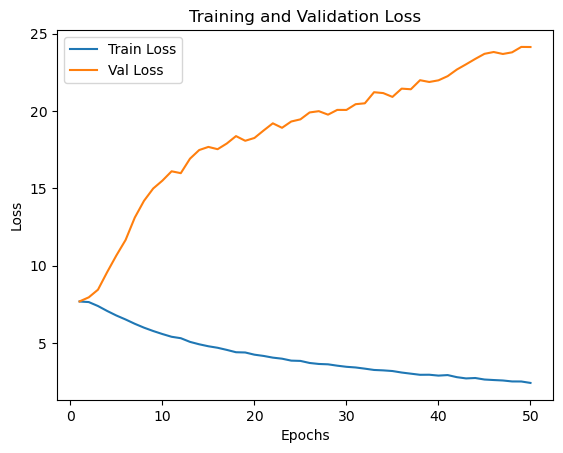

In [71]:
import os

# Plotting the training and validation loss
plt.plot(epochs, loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Define the path to save the plot
save_path = r"C:\Users\naimu\Music\Speech Recognition ML DL AI"

# Check if the directory exists, if not, create it
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Save the plot to the specified path
plt.savefig(os.path.join(save_path, 'Multiple_Language_training_validation_loss_plot.png'))

# Display the plot
plt.show()


In [ ]:
#This project seems to be a speech recognition system that aims to classify spoken language samples into different languages using machine learning and deep learning techniques. Here's a breakdown of the project:

#1. **Data Loading and Preprocessing**:
#   - The project starts by importing necessary libraries such as pandas, numpy, seaborn, os, matplotlib, IPython.display, and librosa.
#   - It loads audio data files from a specified directory (`r"C:\Users\naimu\Music\Speech Recognition ML DL AI\Dataset\voice recordings dateset"`) along with their corresponding labels.
#   - The labels are extracted from the file names and stored in lowercase format.
#   - The data is loaded into a DataFrame for further analysis.

#2. **Exploratory Data Analysis (EDA)**:
#   - The distribution of labels (languages) in the dataset is visualized using seaborn's countplot.
#   - Waveforms and spectrograms of audio samples are plotted to visualize the audio data and understand its characteristics.

#3. **Feature Extraction**:
#   - Mel-frequency cepstral coefficients (MFCCs) are extracted from audio files using librosa library. MFCCs are commonly used features in speech processing tasks.

#4. **Model Building**:
#   - The extracted MFCC features are used as input data.
#   - The target labels are one-hot encoded.
#   - A Sequential model is constructed using Keras, consisting of LSTM layers followed by dropout layers and dense layers with ReLU activation.
#   - The model is compiled with categorical crossentropy loss and Adam optimizer.

#5. **Model Training**:
#   - The model is trained using the extracted features and one-hot encoded labels.
#   - Training/validation loss and accuracy are monitored over epochs.

#6. **Model Evaluation**:
#   - Training and validation loss/accuracy curves are plotted to visualize the training process and detect overfitting.

#7. **Saving Plots**:
#   - The plots of training/validation accuracy and loss are saved as images in the specified directory (`C:\Users\naimu\Music\Speech Recognition ML DL AI`).


In [ ]:
# 1. **Data Loading and Preprocessing**:
#    - First, import the necessary libraries: pandas, numpy, seaborn, os, matplotlib, IPython.display, and librosa.
#    - Load audio data files from a specified directory (`r"C:\Users\naimu\Music\Speech Recognition ML DL AI\Dataset\voice recordings dateset"`) along with their corresponding labels.
#    - Extract labels from the file names and store them in lowercase format.
#    - Load the data into a DataFrame for further analysis.

# 2. **Exploratory Data Analysis (EDA)**:
#    - Visualize the distribution of labels (languages) in the dataset using seaborn's countplot.
#    - Plot waveforms and spectrograms of audio samples to visualize the audio data and understand its characteristics.

# 3. **Feature Extraction**:
#    - Extract Mel-frequency cepstral coefficients (MFCCs) from audio files using the librosa library. MFCCs are commonly used features in speech processing tasks.

# 4. **Model Building**:
#    - Use the extracted MFCC features as input data.
#    - One-hot encode the target labels.
#    - Construct a Sequential model using Keras:
#      - LSTM layers followed by dropout layers.
#      - Dense layers with ReLU activation.
#      - Output layer with softmax activation.
#    - Compile the model with categorical crossentropy loss and Adam optimizer.

# 5. **Model Training**:
#    - Train the model using the extracted features and one-hot encoded labels.
#    - Monitor training/validation loss and accuracy over epochs.

# 6. **Model Evaluation**:
#    - Plot training and validation loss/accuracy curves to visualize the training process and detect overfitting.

# 7. **Saving Plots**:
#    - Save the plots of training/validation accuracy and loss as images in the specified directory (`C:\Users\naimu\Music\Speech Recognition ML DL AI`).

# To work on this project:
# - Make sure you have the necessary libraries installed (pandas, numpy, seaborn, matplotlib, librosa, etc.).
# - Organize your audio data files in the specified directory structure.
# - Follow the step-by-step process outlined above, running each code cell in your Python environment.
# - Analyze the results and make improvements as needed in the model architecture, data preprocessing, etc., to enhance performance.
